In [1]:
#Kütüphaneler yüklendi
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

%matplotlib inline  


In [11]:
# veri setini yükle
df = pd.read_csv("C:\\Users\\Meltem\\Documents\\Kiz_Basina_Final\\Airline Passenger Satisfaction Dataset\\train.csv")



# verinin ilk 5 satırını görüntüle
print(df.head())

# verinin genel bilgilerini gör
print(df.info())

# sayısal sütunların temel istatistiklerini gör
print(df.describe())


   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                

In [3]:
# sayısal değişkenleri seç
num_summary = df.describe()
print(num_summary)

# kategorik değişkenlerin dağılımı
cat_columns = df.select_dtypes(include='object').columns
for col in cat_columns:
    print(f'\n{col} değişkeninin dağılımı:')
    print(df[col].value_counts())


          Unnamed: 0             id            Age  Flight Distance  \
count  103904.000000  103904.000000  103904.000000    103904.000000   
mean    51951.500000   64924.210502      39.379706      1189.448375   
std     29994.645522   37463.812252      15.114964       997.147281   
min         0.000000       1.000000       7.000000        31.000000   
25%     25975.750000   32533.750000      27.000000       414.000000   
50%     51951.500000   64856.500000      40.000000       843.000000   
75%     77927.250000   97368.250000      51.000000      1743.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                           0.000000   
25%                 2.000

In [4]:
# eksik değerlerin hangi sütunlarda olduğunu ve sayısını gör
missing_values = df.isnull().sum()

# sadece eksik değeri olan sütunları listele
missing_values = missing_values[missing_values > 0]

print('Columns with missing values ​​and numbers of missing values:')
print(missing_values)

# eksik değer oranlarını ondalık yap
missing_percentage = (missing_values / len(df)) * 100
print('\nEksik değer oranları (%):')
print(missing_percentage)


Columns with missing values ​​and numbers of missing values:
Arrival Delay in Minutes    310
dtype: int64

Eksik değer oranları (%):
Arrival Delay in Minutes    0.298352
dtype: float64


In [5]:
# arrival delay sütununun eksik olan satırlarını veri setinden çıkar
df = df.dropna(subset=['Arrival Delay in Minutes'])

# satır sil sonrası veri boyutu kontrolü
print(f"Number of remaining data rows: {len(df)}")


Number of remaining data rows: 103594


Age değişkeninde 0 aykırı değer bulundu.
Age için alt sınır: -9.0, üst sınır: 87.0


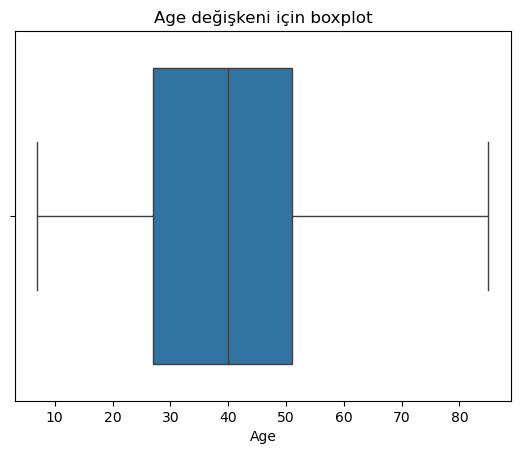

Flight Distance değişkeninde 2287 aykırı değer bulundu.
Flight Distance için alt sınır: -1579.5, üst sınır: 3736.5


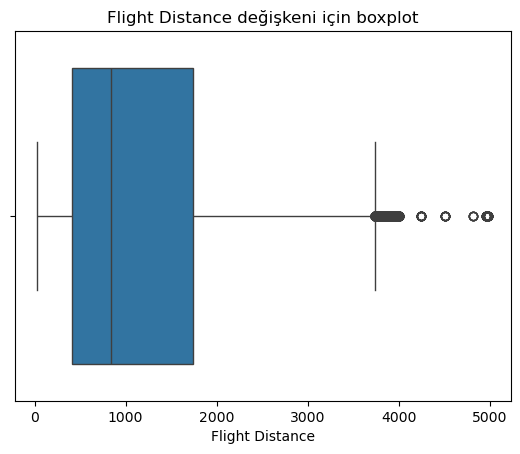

Departure Delay in Minutes değişkeninde 14428 aykırı değer bulundu.
Departure Delay in Minutes için alt sınır: -18.0, üst sınır: 30.0


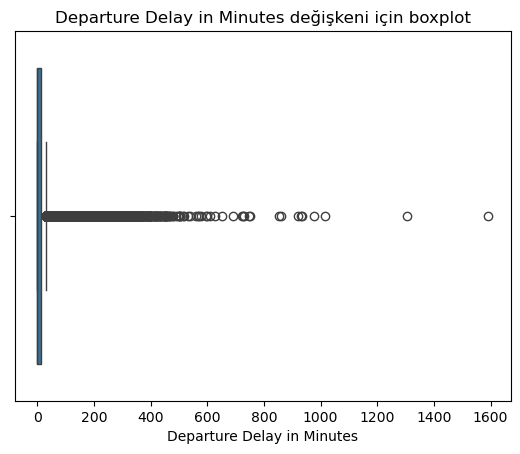

Arrival Delay in Minutes değişkeninde 13954 aykırı değer bulundu.
Arrival Delay in Minutes için alt sınır: -19.5, üst sınır: 32.5


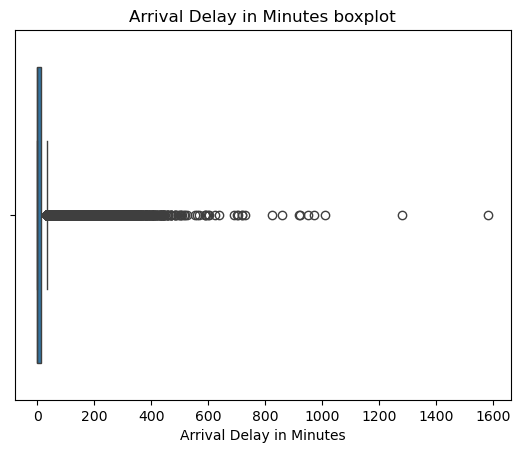

In [6]:
# veri kümelerinden aykırı değerleri belirleme ve kaldırmak için IQR yöntemi kullanımı ve aykırı değer analizini kolaylaştırmak için fonksiyon yazma
def detect_outliers_iqr(df, column):
    # sütunun çeyrek değerlerini hesapladım
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # alt ve üst sınırları belirledim
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # aykırı değerlerin sayısını buldum
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"{column} değişkeninde {len(outliers)} aykırı değer bulundu.")
    
    # aykırı değerlerin sınırlarını yazdım
    print(f"{column} için alt sınır: {lower_bound}, üst sınır: {upper_bound}")
    
    return outliers

# Age değişkeni için analiz ve grafik
detect_outliers_iqr(df, 'Age')
sns.boxplot(x=df['Age'])
plt.title('Age değişkeni için boxplot')
plt.show()

# Flight Distance değişkeni için analiz ve grafik
detect_outliers_iqr(df, 'Flight Distance')
sns.boxplot(x=df['Flight Distance'])
plt.title('Flight Distance değişkeni için boxplot')
plt.show()

# Departure Delay değişkeni için analiz ve grafik
detect_outliers_iqr(df, 'Departure Delay in Minutes')
sns.boxplot(x=df['Departure Delay in Minutes'])
plt.title('Departure Delay in Minutes değişkeni için boxplot')
plt.show()

# Arrival Delay değişkeni için analiz ve grafik
detect_outliers_iqr(df, 'Arrival Delay in Minutes')
sns.boxplot(x=df['Arrival Delay in Minutes'])
plt.title('Arrival Delay in Minutes boxplot')
plt.show()


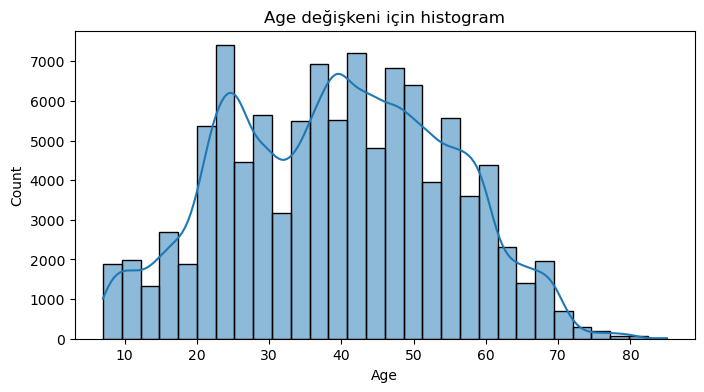

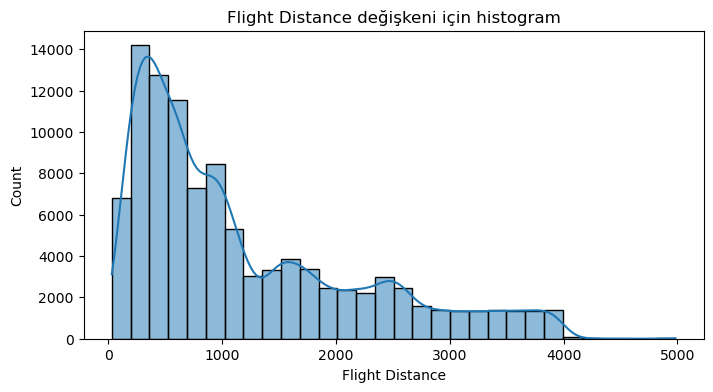

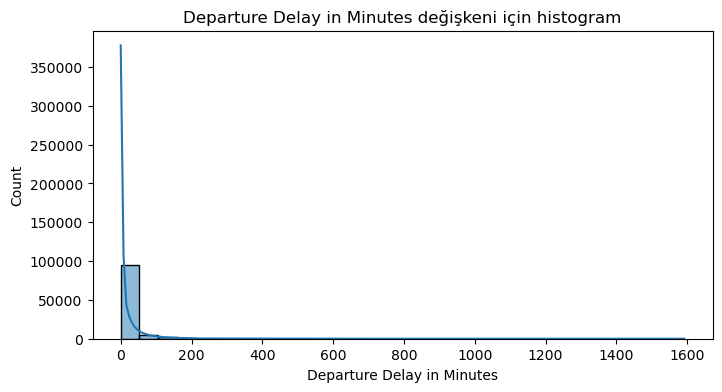

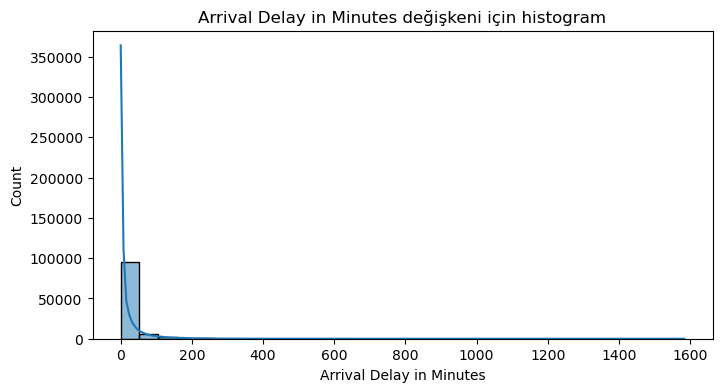

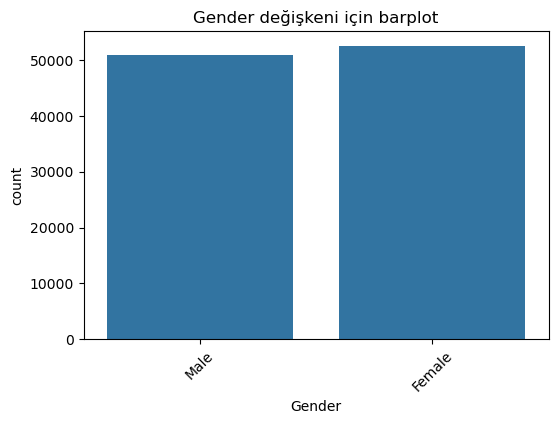

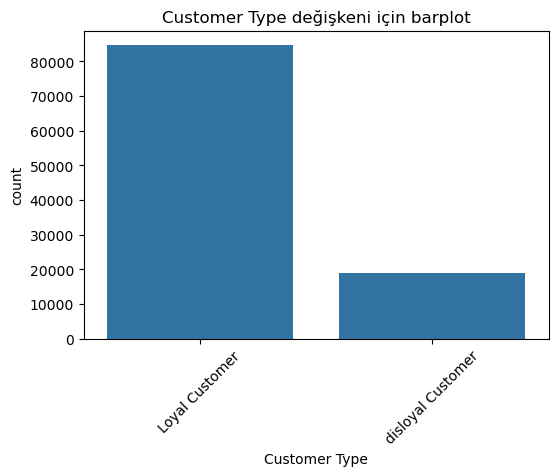

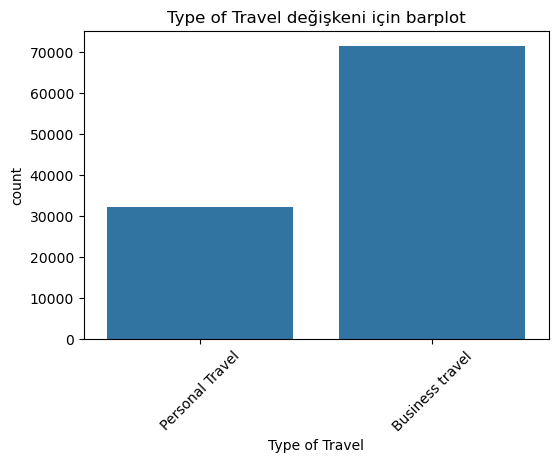

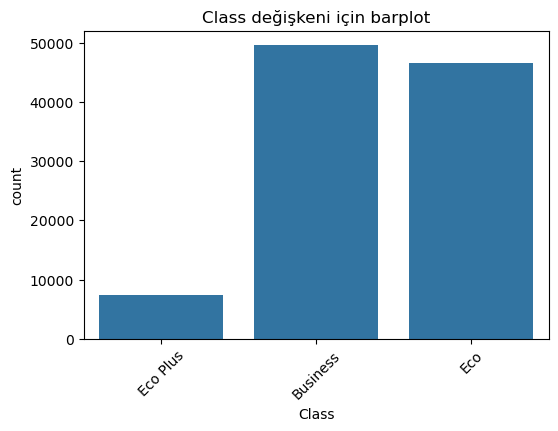

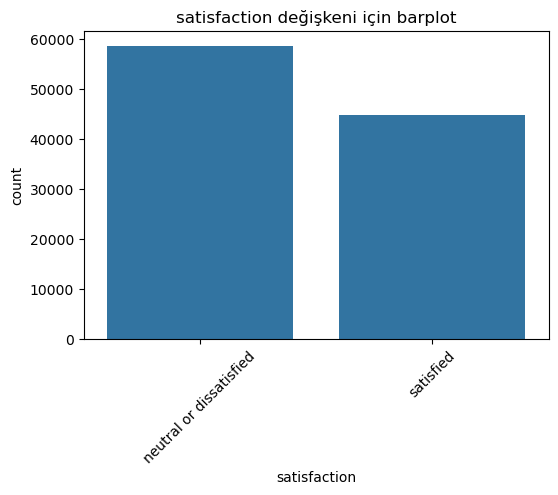

In [7]:
# sayısal değişkenler için histogram çiz
num_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
for col in num_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'{col} değişkeni için histogram')
    plt.show()

# kategorik değişkenler için barplot çiz
cat_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
for col in cat_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f'{col} değişkeni için barplot')
    plt.xticks(rotation=45)
    plt.show()


In [8]:
df = df.rename(columns={
    'Gender': 'Cinsiyet',
    'Customer Type': 'Müşteri Türü',
    'Age': 'Yaş',
    'Type of Travel': 'Seyahat Türü',
    'Class': 'Uçuş Sınıfı',
    'Flight Distance': 'Uçuş Mesafesi',
    'Inflight wifi service': 'Wifi Hizmeti',
    'Departure/Arrival time convenient': 'Zaman Uygunluğu',
    'Ease of Online booking': 'Online Rezervasyon Kolaylığı',
    'Gate location': 'Kapı Konumu',
    'Food and drink': 'Yiyecek İçecek',
    'Online boarding': 'Online Biniş',
    'Seat comfort': 'Koltuk Rahatlığı',
    'Inflight entertainment': 'Eğlence',
    'On-board service': 'Servis Kalitesi',
    'Leg room service': 'Bacak Alanı',
    'Baggage handling': 'Bagaj İşlemleri',
    'Checkin service': 'Check-in Hizmeti',
    'Inflight service': 'Uçuş İçi Hizmet',
    'Cleanliness': 'Temizlik',
    'Departure Delay in Minutes': 'Kalkış Gecikmesi (dk)',
    'Arrival Delay in Minutes': 'Varış Gecikmesi (dk)',
    'satisfaction': 'Memnuniyet'
})


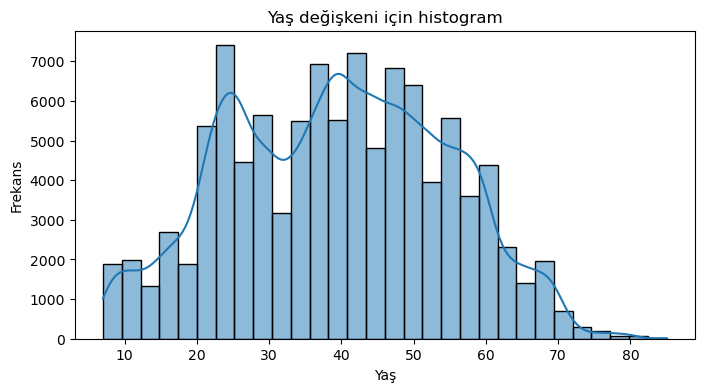

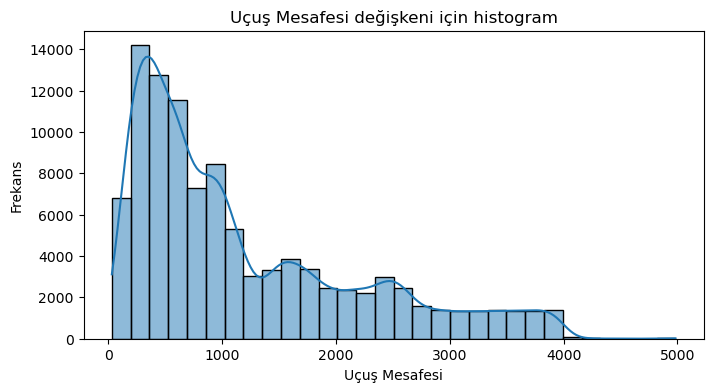

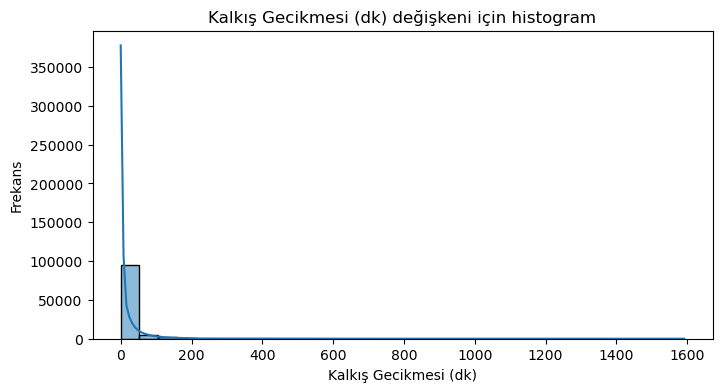

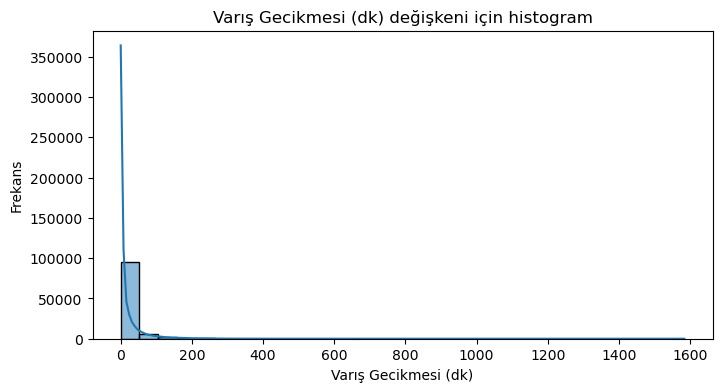

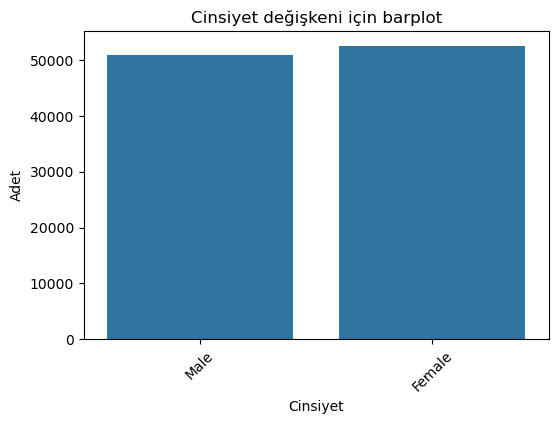

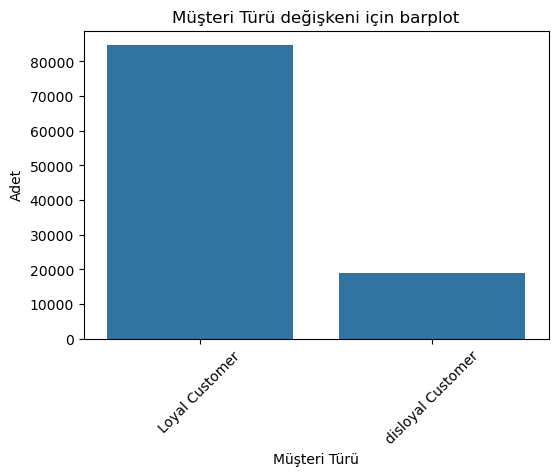

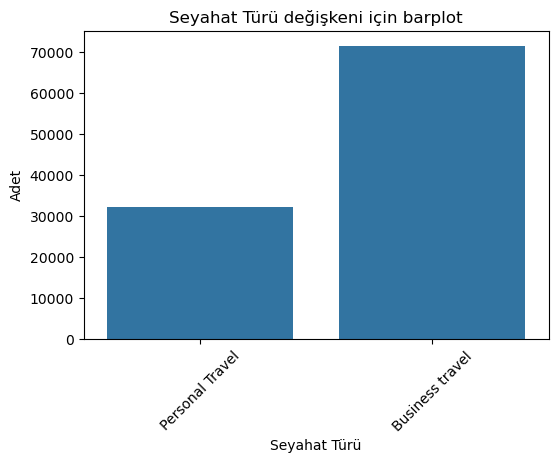

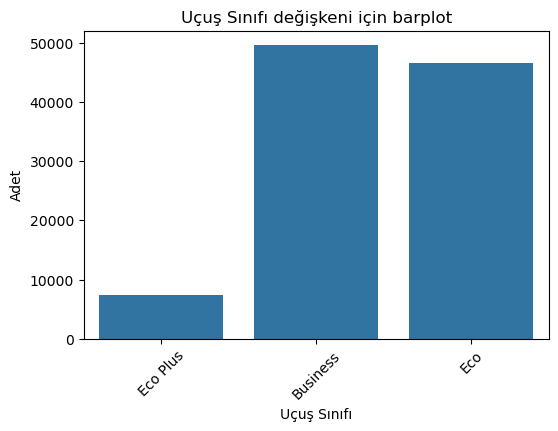

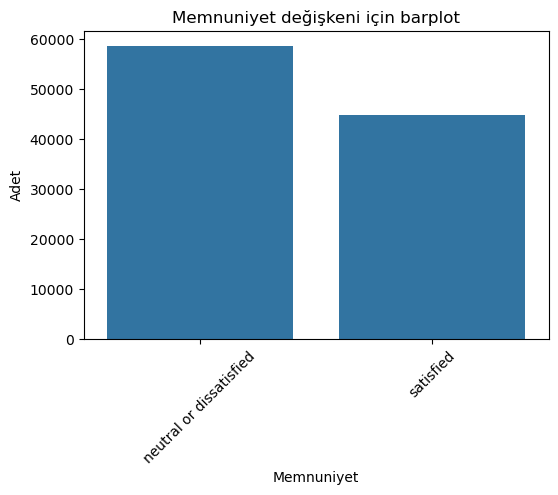

In [9]:
# sayısal değişkenler için Türkçe başlıklarla histogramlar
num_columns = ['Yaş', 'Uçuş Mesafesi', 'Kalkış Gecikmesi (dk)', 'Varış Gecikmesi (dk)']
for col in num_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'{col} değişkeni için histogram')
    plt.xlabel(col)
    plt.ylabel('Frekans')
    plt.show()

# kategorik değişkenler için Türkçe başlıklarla barplotlar 
cat_columns = ['Cinsiyet', 'Müşteri Türü', 'Seyahat Türü', 'Uçuş Sınıfı', 'Memnuniyet']
for col in cat_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f'{col} değişkeni için barplot')
    plt.xlabel(col)
    plt.ylabel('Adet')
    plt.xticks(rotation=45)
    plt.show()
